<a href="https://colab.research.google.com/github/gogifemi/cannabis-health-diagnosis/blob/main/(colab)canhealth_baseCNN_128v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/gogifemi/cannabis-health-diagnosis.git

Cloning into 'cannabis-health-diagnosis'...
remote: Enumerating objects: 111, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 111 (delta 8), reused 8 (delta 4), pack-reused 85 (from 1)
Receiving objects: 100% (111/111), 212.75 MiB | 14.76 MiB/s, done.
Resolving deltas: 100% (42/42), done.
Updating files: 100% (15/15), done.


In [2]:
# importing the required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from time import perf_counter
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Activation, Flatten
import cv2
import numpy as np

In [3]:
!unzip /content/cannabis-health-diagnosis/data.zip -d /content/cannabis-health-diagnosis/data/

Archive:  /content/cannabis-health-diagnosis/data.zip
   creating: /content/cannabis-health-diagnosis/data/test/
   creating: /content/cannabis-health-diagnosis/data/train/
   creating: /content/cannabis-health-diagnosis/data/valid/
   creating: /content/cannabis-health-diagnosis/data/test/Aphids/
   creating: /content/cannabis-health-diagnosis/data/test/Botrytis/
   creating: /content/cannabis-health-diagnosis/data/test/Dehydration/
   creating: /content/cannabis-health-diagnosis/data/test/Healthy/
   creating: /content/cannabis-health-diagnosis/data/test/Leaf Miners/
   creating: /content/cannabis-health-diagnosis/data/test/Nitrogen Deficiency/
   creating: /content/cannabis-health-diagnosis/data/test/Nutrient Burn/
   creating: /content/cannabis-health-diagnosis/data/test/Overwatering/
   creating: /content/cannabis-health-diagnosis/data/test/PH Fluctuation/
   creating: /content/cannabis-health-diagnosis/data/test/Phosphorus Deficiency/
   creating: /content/cannabis-health-diagnos

In [4]:
!ls /content/cannabis-health-diagnosis/data/

test  train  valid


In [33]:
# Defining the paths to the data folders
train_dir = '/content/cannabis-health-diagnosis/data/train'
test_dir = '/content/cannabis-health-diagnosis/data/test'
valid_dir = '/content/cannabis-health-diagnosis/data/valid'

In [34]:
# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(rescale=1./255)

In [35]:
# Load the train data
train_data = datagen.flow_from_directory(train_dir,
                                         target_size=(128, 128), # Adjust to your image size
                                         class_mode='categorical')

# Load the validation data
valid_data = datagen.flow_from_directory(valid_dir,
                                         target_size=(128, 128),
                                         class_mode='categorical')

# Load the test data
test_data = datagen.flow_from_directory(test_dir,
                                        target_size=(128, 128),
                                        class_mode='categorical',
                                        shuffle=False)  # No need to shuffle test data

Found 1300 images belonging to 13 classes.
Found 260 images belonging to 13 classes.
Found 26 images belonging to 13 classes.


In [36]:
from keras.layers import Input, BatchNormalization, Dropout

In [37]:
model = Sequential([
    Input(shape=(128,128,3)),

    Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    MaxPooling2D(pool_size=(2,2),strides=2),
    BatchNormalization(axis=1),
    Dropout(0.25),

    Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    MaxPooling2D(pool_size=(2,2),strides=2),
    BatchNormalization(axis=1),
    Dropout(0.25),

    Conv2D(filters=16,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    MaxPooling2D(pool_size=(2,2),strides=2),
    BatchNormalization(axis=1),
    Dropout(0.25),

    Flatten(),
    Dense(units=128,activation='relu'),
    Dense(units=13,activation='softmax')
])

In [38]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 16, 16, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 16, 16, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 16, 16, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 13)                  │           1,677 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 551,421 (2.10 MB)

 Trainable params: 551,197 (2.10 MB)

 Non-trainable params: 224 (896.00 B)

In [39]:
from tensorflow.keras.optimizers import Adam

In [40]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss="categorical_crossentropy",
              metrics=["accuracy"],
              )

In [41]:
import keras

In [42]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

In [43]:
epochs = 100
checkpoint_filepath = '/content/cannabis-health-diagnosis/models/checkpoint_128.model.keras'

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

accuracy_metrics = model.fit(
    x=train_data,
    epochs=epochs,
    validation_data=valid_data,
    batch_size=20,
    callbacks=[early_stop, model_checkpoint_callback])

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 24s 384ms/step - accuracy: 0.0996 - loss: 2.9651 - val_accuracy: 0.0885 - val_loss: 2.6144
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 23s 66ms/step - accuracy: 0.2205 - loss: 2.3019 - val_accuracy: 0.0769 - val_loss: 2.8733
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - accuracy: 0.3530 - loss: 1.9979 - val_accuracy: 0.0769 - val_loss: 3.4139
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.4295 - loss: 1.6892 - val_accuracy: 0.0769 - val_loss: 4.0276
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - accuracy: 0.6145 - loss: 1.2071 - val_accuracy: 0.0769 - val_loss: 4.5807
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 0.6932 - loss: 1.0088 - val_accuracy: 0.0769 - val_loss: 4.6795
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.7798 - loss: 0.7418 - val_accuracy: 0.0769 - val_loss: 5.3180
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.8376 - loss: 0.5671 - val_accuracy: 0.0769 - va

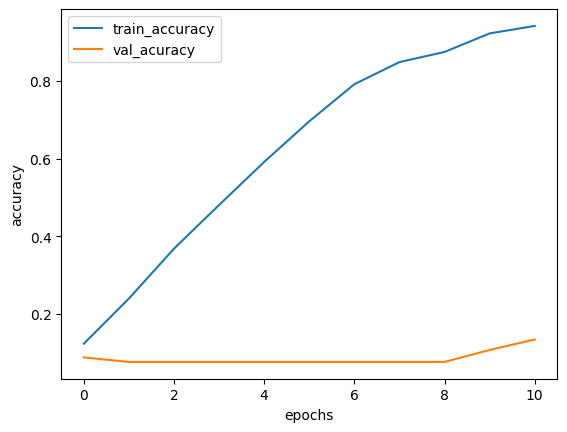

In [44]:
from matplotlib import pyplot as plt
plt.plot(accuracy_metrics.history['accuracy'],label='train_accuracy')
plt.plot(accuracy_metrics.history['val_accuracy'],label='val_acuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

In [45]:
print(f"At the end of the {epochs}th epoch the validation accuracy has reached {'{:.4f}'.format(accuracy_metrics.history['val_accuracy'][-1])}")

At the end of the 100th epoch the validation accuracy has reached 0.1346


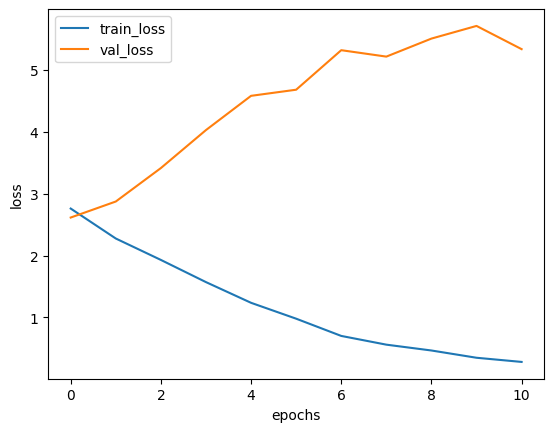

In [46]:
from matplotlib import pyplot as plt
plt.plot(accuracy_metrics.history['loss'],label='train_loss')
plt.plot(accuracy_metrics.history['val_loss'],label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [47]:
print(f"At the end of the {epochs}th epoch the validation loss has decreased to {'{:.4f}'.format(accuracy_metrics.history['val_loss'][-1])}")

At the end of the 100th epoch the validation loss has decreased to 5.3349


In [48]:
model.save('models/baseCNN_reluAdam_128v2.h5')

In [49]:
model.save('models/baseCNN_reluAdam_128v2.keras')

In [50]:
valid_pred1 = model.predict(valid_data)

9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step


In [51]:
valid_pred1.shape

(260, 13)

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [53]:
valid_pred_labels1 = valid_pred1.argmax(axis=1)

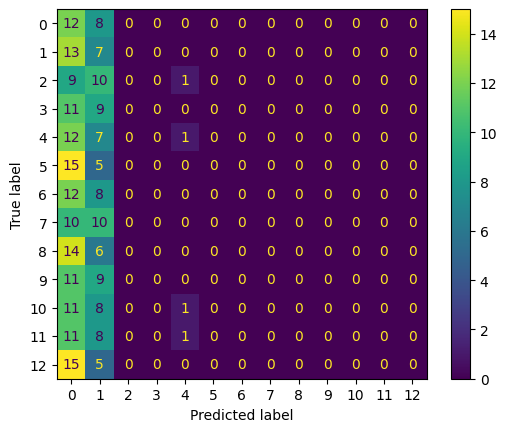

In [54]:
ConfusionMatrixDisplay(confusion_matrix(valid_data.labels, valid_pred_labels1)).plot()

In [55]:
!zip -r /content/modelsv2.zip /content/models

  adding: content/models/ (stored 0%)
  adding: content/models/baseCNN_reluAdam_128.keras (deflated 8%)
  adding: content/models/baseCNN_reluAdam_128v2.h5 (deflated 9%)
  adding: content/models/baseCNN_reluAdam_128.h5 (deflated 8%)
  adding: content/models/baseCNN_reluAdam_128v2.keras (deflated 9%)


In [56]:
from google.colab import files
files.download('/content/modelsv2.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>